#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading train data
import pandas as pd
df_train=pd.read_csv('F:/flip robo intership31/Malignant Comments Classifier Project/train.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_train.shape

(159571, 8)

In [4]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [5]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [6]:
df_train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [7]:
df_train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [8]:
df_train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [9]:
df_train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [10]:
#Loading test data
import pandas as pd
df_test=pd.read_csv('F:/flip robo intership31/Malignant Comments Classifier Project/test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [11]:
df_test.shape

(153164, 2)

In [12]:

df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [13]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [14]:
df_test.dtypes

id              object
comment_text    object
dtype: object

In [15]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

We can see that there are no null values present in both training and testing datasets.

# Exploratory Data Analysis

In [16]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


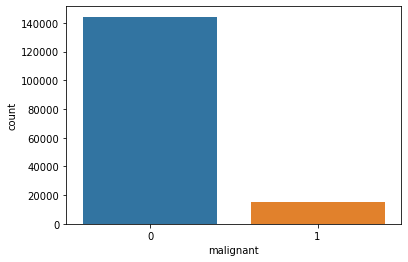

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


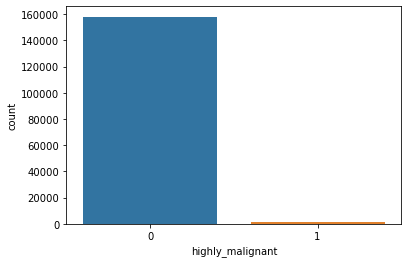

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


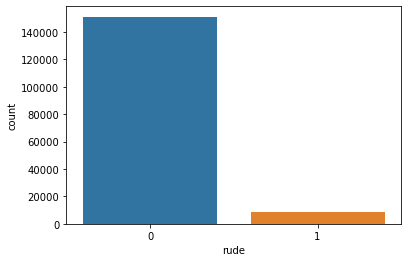

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


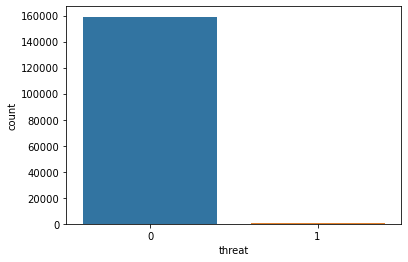

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


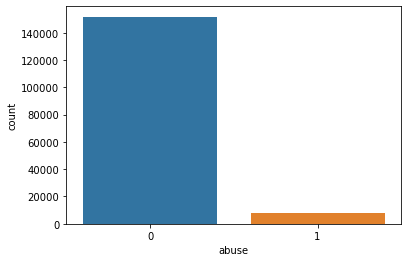

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


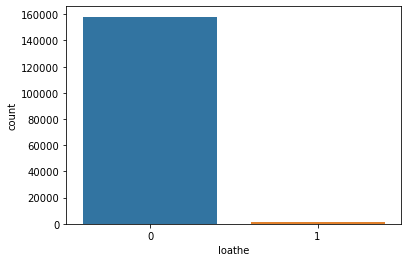

In [17]:






#Plotting countplot for all the features
categories=df_train.columns[2:]
for col in categories:
    sns.countplot(df_train[col])
    plt.show()

While maximum Categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum

In [18]:
#Checking the percentage of the comments
none = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(none)/len(df_train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can see that there are more good/neutral comments rather than negative comments

In [19]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,2:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


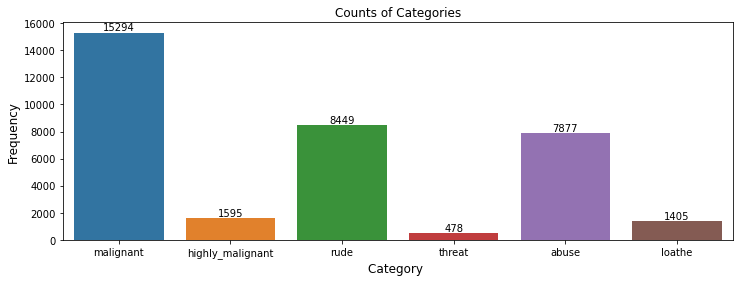

In [20]:

#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Malignant comments are the highest among all whereas threat comments are very less. Rude and abuse comments are also present more

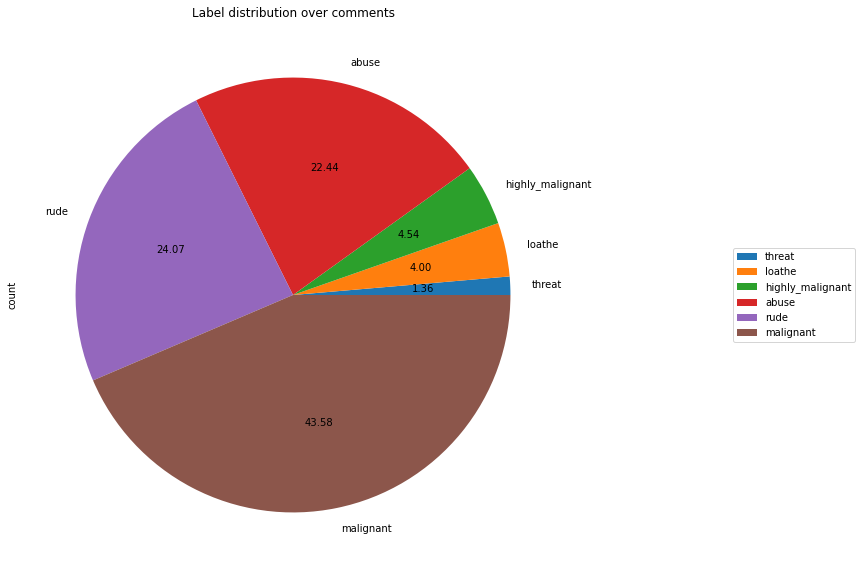

In [21]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comment_text', ylabel='Density'>

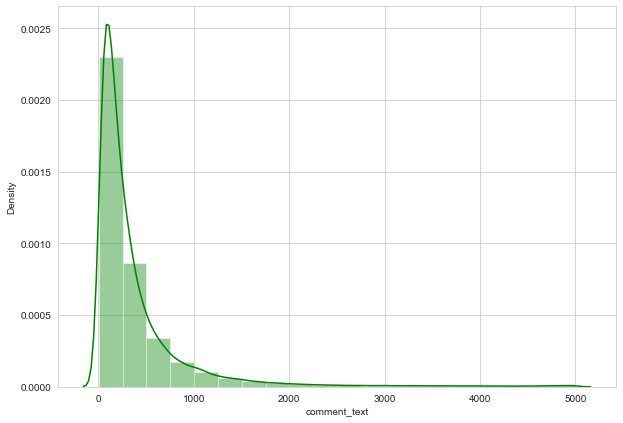

In [22]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


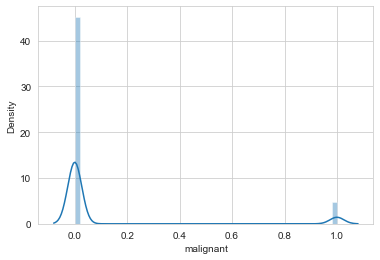

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


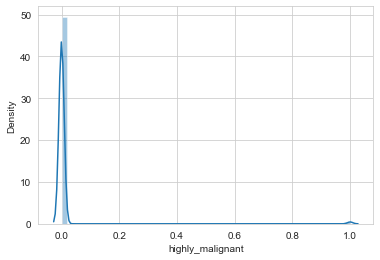

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


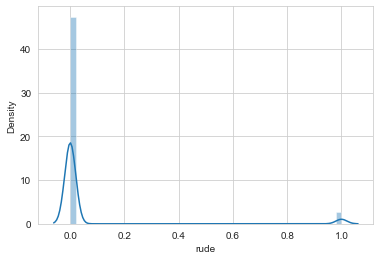

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


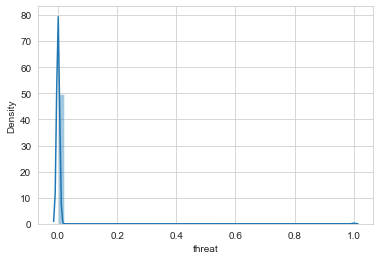

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


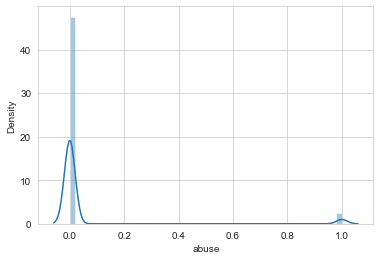

C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


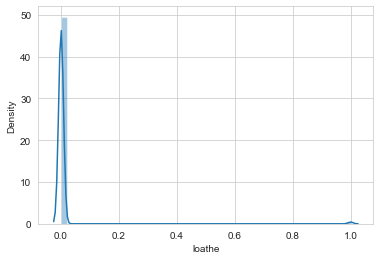

In [23]:
#Plotting distplot for checking the distribution of data
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

We can see that most data are normally distributed

In [24]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The minimum value and the maximum value of the attributes is same i.e., 0 and 1 respectively.
The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.
Here, with this statistical analysis, it is interpreted that there are no outliers as well as skewness present in this training dataset.
The count of each field is equal which shows that there are no missing values present.

In [25]:
corr=df_train.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


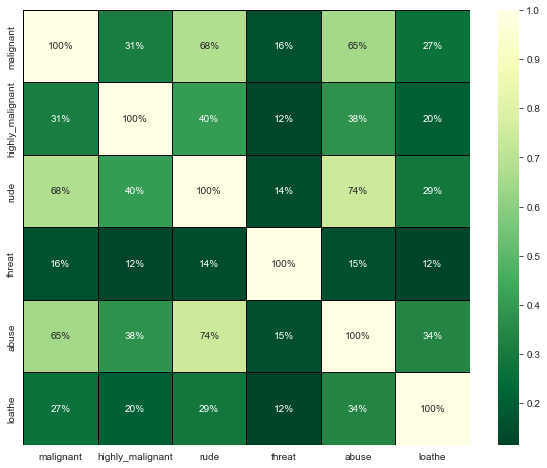

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='YlGn_r',annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.
Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.
Overall the correlation among the attributes is not positive.

In [27]:
df_train.drop('id',axis=1,inplace=True)

# Data pre-processing

In [28]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_train[comments_labels].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [29]:
df_train['label']=df_train[comments_labels].sum(axis=1)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


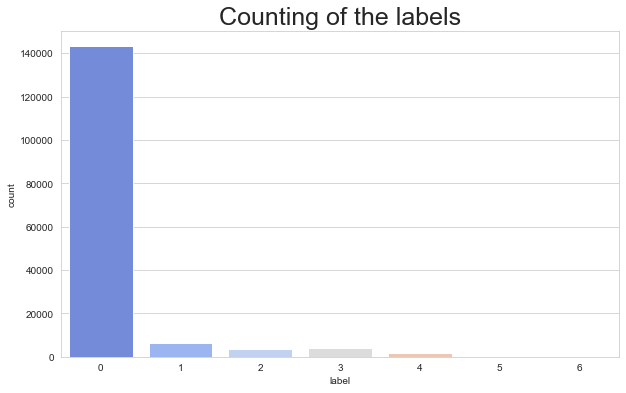

In [30]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df_train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [31]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

We can see that 0 has more number of weightage, whereas 6 has the lesser weightage

In [32]:
#Scaling the label column
df_train['label'] = df_train['label'] >0
df_train['label'] = df_train['label'].astype(int)
df_train.head(15)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143346
1     16225
Name: label, dtype: int64


C:\Users\Saranya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


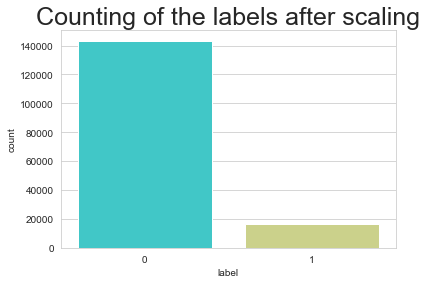

In [33]:
print(df_train['label'].value_counts())
sns.countplot(df_train['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

After scaling the data, we can see that 0 has more weightage and 1 has lesser weightage

In [34]:
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [35]:
df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Preprocessing using NLP

In [36]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

In [39]:
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [40]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [44]:
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


We can see that nearly half of the text has been removed from the comment_text after using required pre-processing

In [45]:
#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [46]:
#Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [47]:
df_test['len_after_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning,len_after_cleaning
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [48]:
#Total length removal in test dataset
print('Original Length:',df_test.length_before_cleaning.sum())
print('Clean Length:',df_test.len_after_cleaning.sum())
print("Total Words Removed:", (df_test.length_before_cleaning.sum()) - (df_test.len_after_cleaning.sum()))

Original Length: 55885733
Clean Length: 34282033
Total Words Removed: 21603700


# Plotting wordcloud for each feature

In [49]:
df_malignant=df_train[(df_train['malignant']==1)]
df_malignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
12,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319,197
16,bye look come think comming back tosser,1,0,0,0,0,0,1,57,39
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


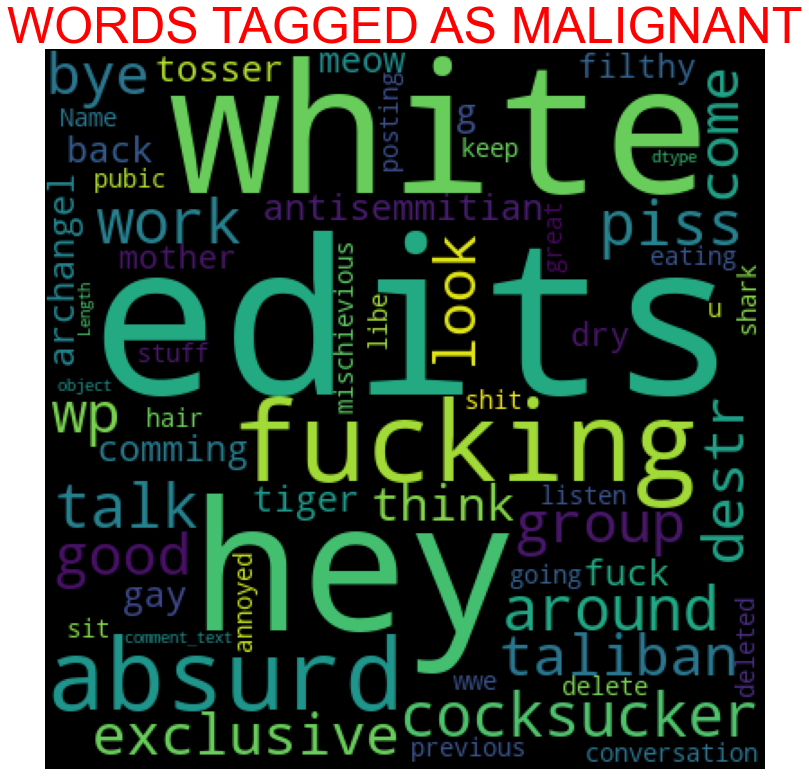

In [50]:
#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [51]:
df_highlymalignant=df_train[(df_train['highly_malignant']==1)]
df_highlymalignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
181,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53,29
442,hi im fucking bitch,1,1,1,0,1,0,1,40,19
579,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67,44
...,...,...,...,...,...,...,...,...,...,...
159096,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251,168
159099,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62,46
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159312,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192,137


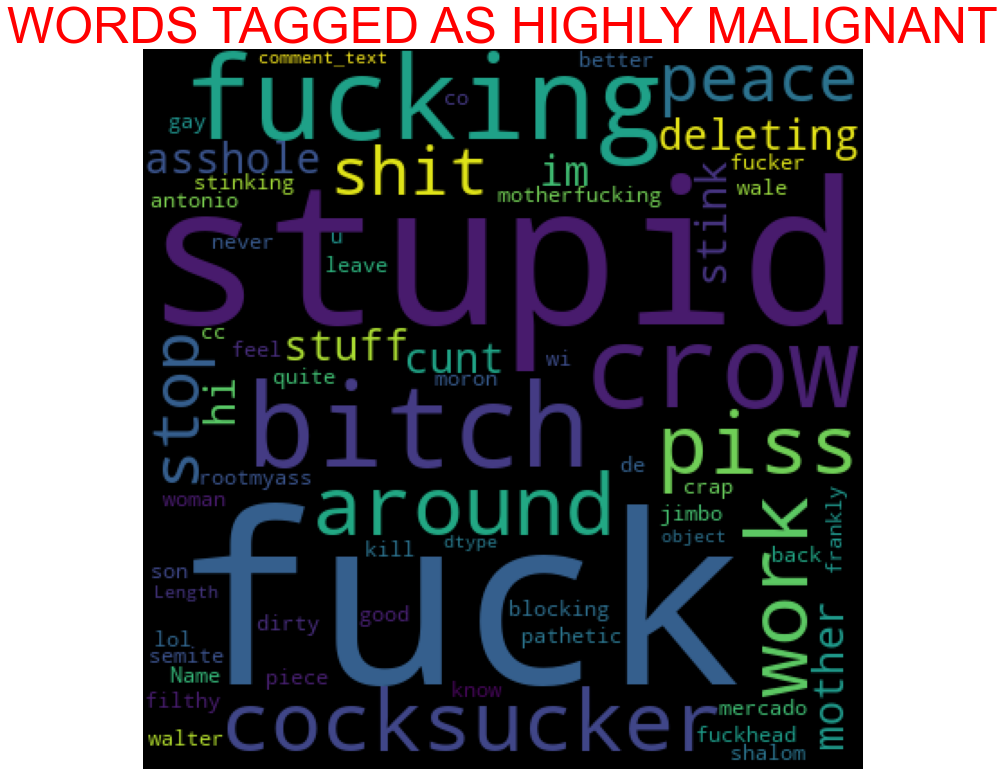

In [52]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [53]:
df_rude=df_train[(df_train['rude']==1)]
df_rude

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
51,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124,75
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
...,...,...,...,...,...,...,...,...,...,...
159411,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91,65
159493,fucking faggot lolwat,1,0,1,0,1,0,1,24,21
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213


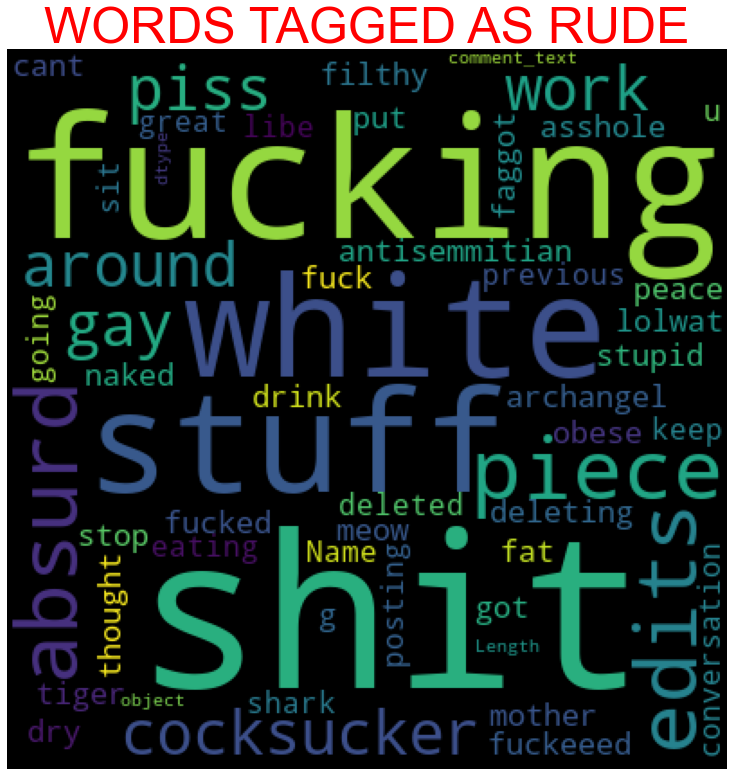

In [54]:

#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [55]:
df_threat=df_train[(df_train['threat']==1)]
df_threat

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
79,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64,43
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
600,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138,66
802,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85,47
1017,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150,75
...,...,...,...,...,...,...,...,...,...,...
157718,bitch fucking hore suck dick big as hole gay f...,1,0,1,1,1,1,1,316,195
158717,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69,48
158856,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212,124
159029,death musulmans,1,0,0,1,0,1,1,19,15


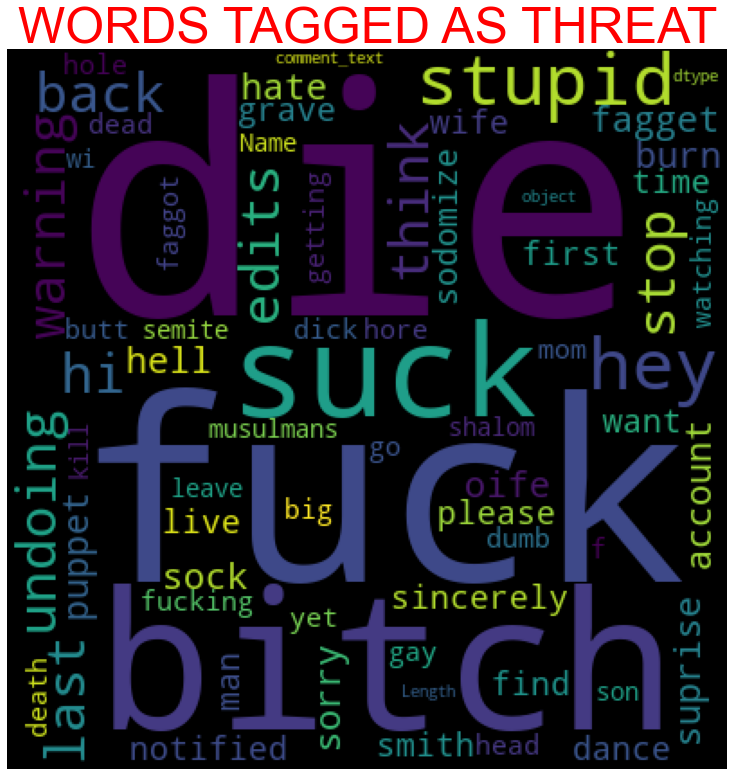

In [56]:
#Plotting for threat
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [57]:
df_abuse=df_train[(df_train['abuse']==1)]
df_abuse

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
56,tony sidaway obviously fistfuckee love arm as,1,0,1,0,1,0,1,68,45
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


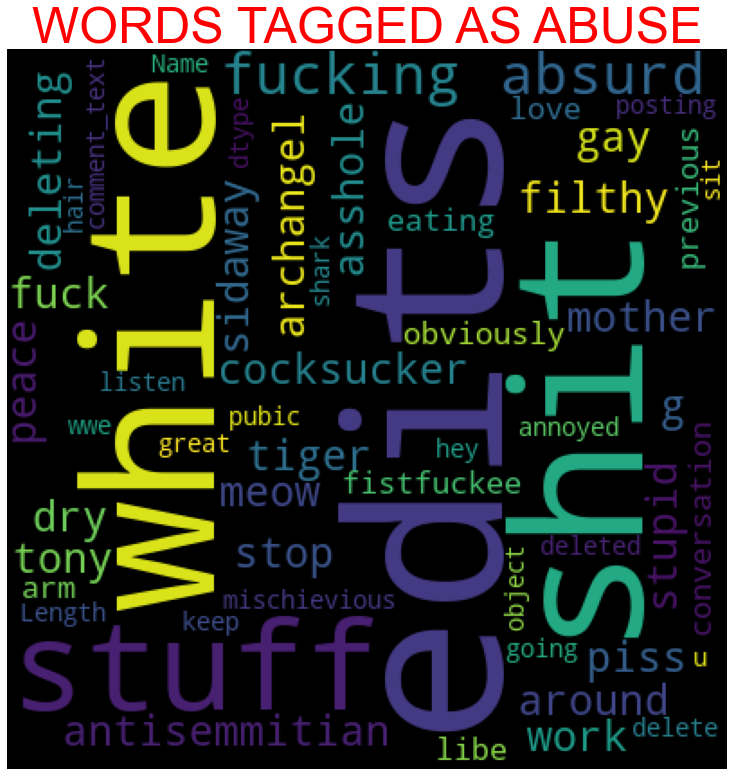

In [58]:
#Plotting for abuse
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [59]:
df_loathe=df_train[(df_train['loathe']==1)]
df_loathe

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
105,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42,35
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
218,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120,58
238,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58,51
...,...,...,...,...,...,...,...,...,...,...
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159336,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110,64
159400,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474,265
159449,think gay fag,1,0,0,0,0,1,1,26,13


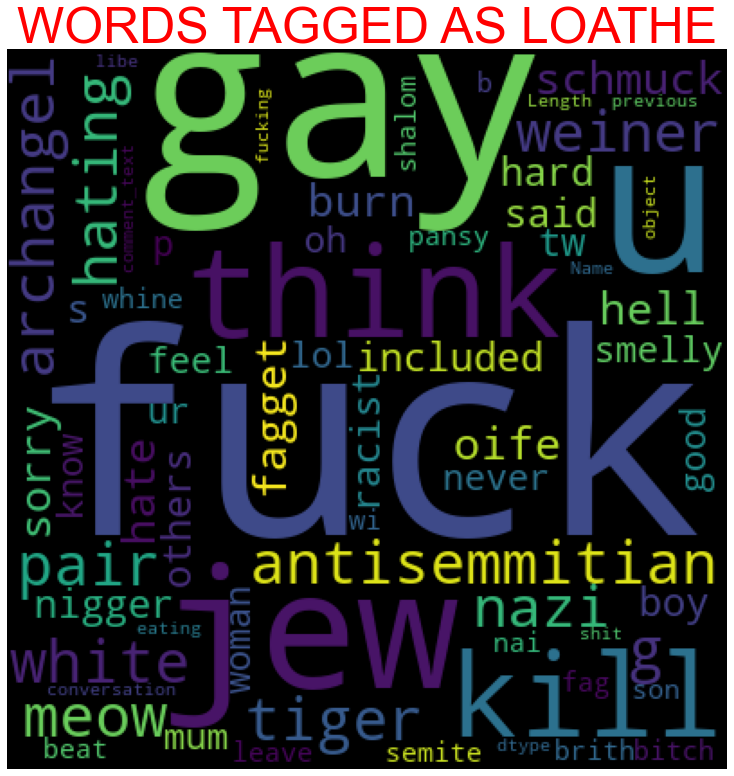

In [60]:
#Plotting for loathe
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

# Separating independent and dependent variables

In [61]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [62]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

In [63]:
y=df_train['label']

In [64]:
print(X.shape,'\t\t', y.shape)

(159571, 15000) 		 (159571,)


In [65]:
#Doing the above process for test data 
test_vec = tf_vec.fit_transform(df_test['comment_text'])
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2870432 stored elements in Compressed Sparse Row format>

In [66]:
test_vec.shape

(153164, 15000)

# Building the model

In [67]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [68]:
#Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 15000) 		 (47872, 15000)


In [69]:
#Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


# Handling the imbalanced data using oversampling technique

In [70]:
#Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [71]:
#We are trying to increase the points of minimum label data
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


C:\Users\Saranya\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [72]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [73]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [74]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('XGBoostClassifier',xgb))

****************************** Logistic Regression ***************************




C:\Users\Saranya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


accuracy_score:  0.9451244986631016




C:\Users\Saranya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saranya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

cross_val_score:  0.956094776134958


roc_auc_score:  0.8970439450817936


Hamming_loss: 0.0548755013368984


Log_loss : 1.8953632698011886


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.84      0.76      4868

    accuracy                           0.95     47872
   macro avg       0.84      0.90      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[41172  1832]
 [  795  4073]]


AUC_ROC curve:



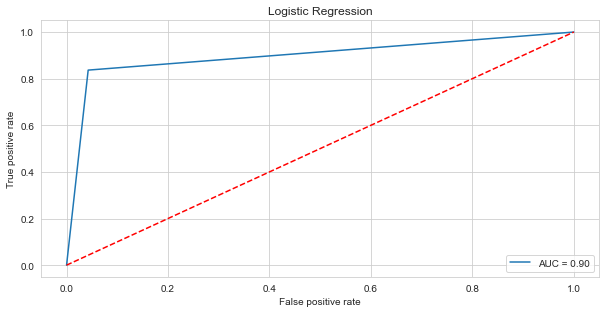





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9100935828877005


cross_val_score:  0.9466005743090046


roc_auc_score:  0.8855612177866239


Hamming_loss: 0.08990641711229946


Log_loss : 3.1053177171551636


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     43004
           1       0.54      0.85      0.66      4868

    accuracy                           0.91     47872
   macro avg       0.76      0.89      0.80     47872
weighted avg       0.94      0.91      0.92     47872



Confusion matrix: 

[[39407  3597]
 [  707  4161]]


AUC_ROC curve:



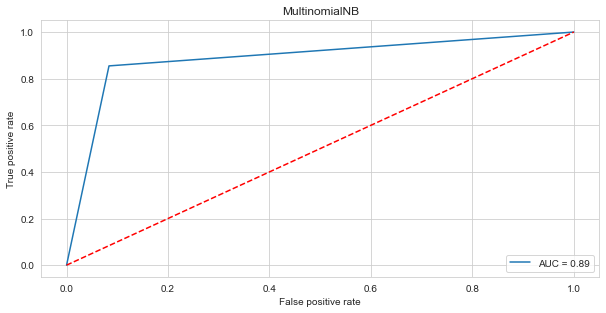





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.92657503342246


cross_val_score:  0.9410732482116895


roc_auc_score:  0.835985112542702


Hamming_loss: 0.07342496657754011


Log_loss : 2.5360446306265163


Classification report:
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     43004
           1       0.62      0.72      0.67      4868

    accuracy                           0.93     47872
   macro avg       0.79      0.84      0.81     47872
weighted avg       0.93      0.93      0.93     47872



Confusion matrix: 

[[40841  2163]
 [ 1352  3516]]


AUC_ROC curve:



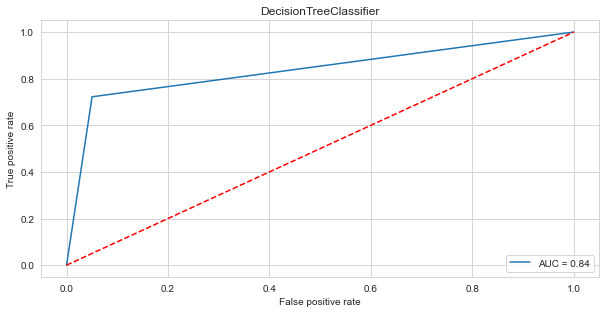





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.7653116644385026


cross_val_score:  0.9178610118092028


roc_auc_score:  0.666526854966846


Hamming_loss: 0.23468833556149732


Log_loss : 8.105998403460745


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     43004
           1       0.23      0.54      0.32      4868

    accuracy                           0.77     47872
   macro avg       0.58      0.67      0.59     47872
weighted avg       0.87      0.77      0.80     47872



Confusion matrix: 

[[33996  9008]
 [ 2227  2641]]


AUC_ROC curve:



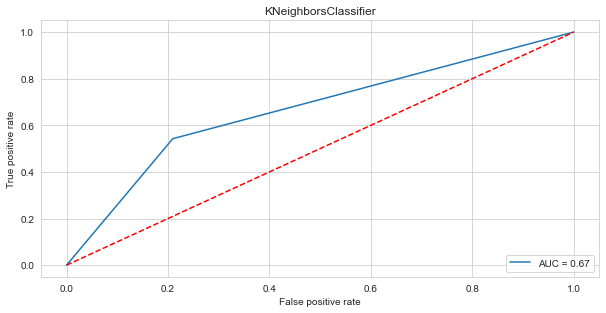





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9527698863636364


cross_val_score:  0.9569533268316441


roc_auc_score:  0.8302532500273044


Hamming_loss: 0.04723011363636364


Log_loss : 1.6312817921275524


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43004
           1       0.83      0.68      0.74      4868

    accuracy                           0.95     47872
   macro avg       0.90      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[42318   686]
 [ 1575  3293]]


AUC_ROC curve:



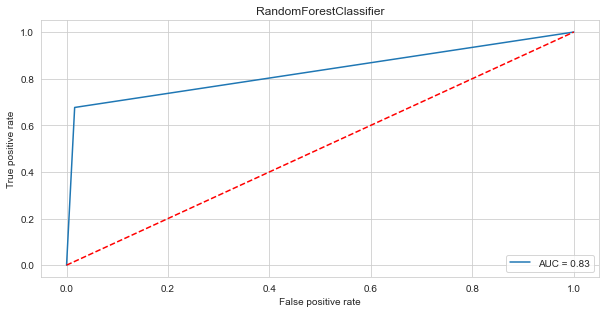





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9244443516042781


cross_val_score:  0.9459174938176664


roc_auc_score:  0.8146694442900995


Hamming_loss: 0.07555564839572193


Log_loss : 2.609633785877742


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     43004
           1       0.62      0.68      0.65      4868

    accuracy                           0.92     47872
   macro avg       0.79      0.81      0.80     47872
weighted avg       0.93      0.92      0.93     47872



Confusion matrix: 

[[40960  2044]
 [ 1573  3295]]


AUC_ROC curve:



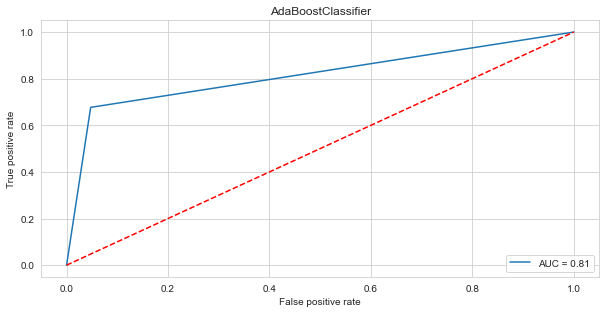





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9437040441176471


cross_val_score:  0.9402648348047944


roc_auc_score:  0.7916880159511255


Hamming_loss: 0.05629595588235294


Log_loss : 1.944405992679475


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43004
           1       0.80      0.60      0.68      4868

    accuracy                           0.94     47872
   macro avg       0.88      0.79      0.83     47872
weighted avg       0.94      0.94      0.94     47872



Confusion matrix: 

[[42252   752]
 [ 1943  2925]]


AUC_ROC curve:



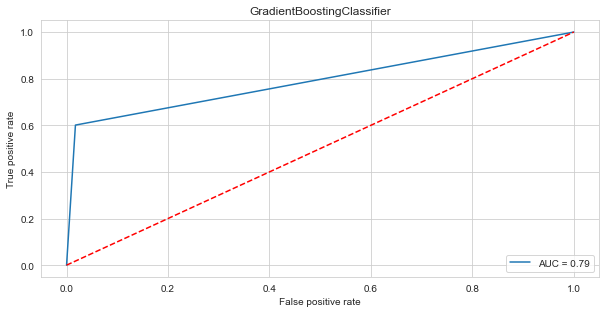





****************************** XGBoostClassifier ***************************




C:\Users\Saranya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:30:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


accuracy_score:  0.9485711898395722




C:\Users\Saranya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:32:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saranya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:34:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saranya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:35:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saranya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:37:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Saranya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:38:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_val_score:  0.9539201927128083


roc_auc_score:  0.8540575843702448


Hamming_loss: 0.05142881016042781


Log_loss : 1.776307783498771


Classification report:
 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.75      0.74      0.74      4868

    accuracy                           0.95     47872
   macro avg       0.86      0.85      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[41830  1174]
 [ 1288  3580]]


AUC_ROC curve:



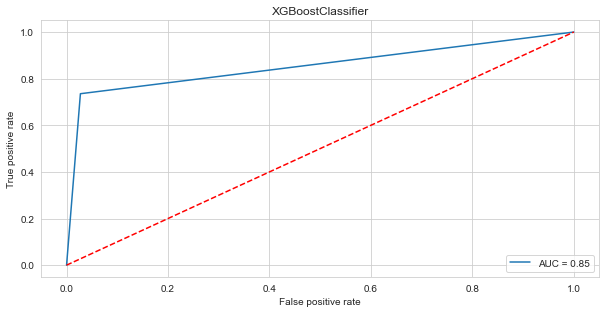

In [75]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

## Hyperparameter Tuning
Random Forest Classifier

In [76]:
parameters={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'n_estimators': [50, 100, 500]}

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)   
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train_os,y_train_os)
print(rfc.best_params_)     
print(rfc.best_score_) 

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.986884815644137


In [78]:
rfc = RandomForestClassifier()
rfc.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [79]:
pred=rfc.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(rfc,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
hloss = hamming_loss(y_test, pre)
print("Hamming_loss:", hloss)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  94.85711898395722
Cross validation score:  95.6840524851318
roc_auc_score:  0.8540575843702448
Hamming_loss: 0.05142881016042781
Log loss: 1.776307783498771
Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.75      0.74      0.74      4868

    accuracy                           0.95     47872
   macro avg       0.86      0.85      0.86     47872
weighted avg       0.95      0.95      0.95     47872

Confusion matrix: 

[[41830  1174]
 [ 1288  3580]]


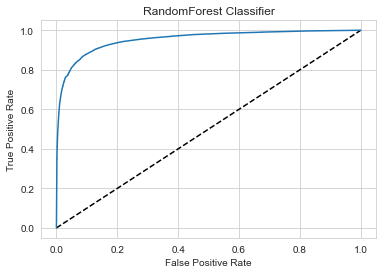

0.8282222241924029


In [80]:
#AUC_ROC Curve of Randomforest Classifier with oversampled data
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

# Finalizing the model

In [81]:
rfc_prediction=rfc.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':rfc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


In [82]:
import pickle
filename='MalignantCommentsClassifier_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb')) 

# Predicting using test data

In [83]:
#Checking our vectorized test data
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2870432 stored elements in Compressed Sparse Row format>

In [84]:
#Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier_Project.pkl','rb'))
fitted_model

RandomForestClassifier()

In [85]:
#Predictions
test_prediction=rfc.predict(test_vec)
test_df=pd.DataFrame({'Predictions':test_prediction})
test_df

,Predictions
0,1
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


# Saving the predictions

In [87]:
#Test predictions
test_results=pd.DataFrame(test_df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [88]:
#Train predictions
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

### Finally, we had predicted over the test data and the predictions obtained were saved in a csv file.

# Conclusion

-> After the completion of this project, we got an insight of how to preprocess the data, analyzing the data and building a model.

-> First, we imported both training and testing data, which had nearly 150000+ records.

-> We did all the required pre-processing steps like checking null values, datatypes check, dropping unnecessary columns, etc.

-> We used the training data for doing Exploratory Data Analysis using various plots and recorded the observations.

-> While observing the results, we found that the dataset was in highly imbalanced side and we need to handle it, in order to avoid overfitting problem.

-> Using NLP, we pre-processed the comment text and did other steps like:

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

Plotting wordclod for knowing the weightage of words used

-> The above steps were done simultaneously for both training and testing data

-> As the problem was a multi-class classifier, we took a new feature known as label and combined the comment_labels output together using sum() and then stored in that feature. For a binary classification problem, we scaled the data accordingly.

-> After applying Tf-idf Vectoriser, we used an oversampling technique called RandomOverSampler for handling the imbalanced data. There, we took 75% of the high points data and sampled it to the low points data so that both weights could be balanced equally and we could get proper result.

-> Then, we split the data using train_test_split and then we started the model building process by running as many algorithms in a for loop, with difference metrics like cross_val_score, confusion matrix, auc_score, log loss, hamming loss, etc.

-> We found that RandomForestClassifier and XGBoostClassifier were performing well. The next step was to perform hyperparameter tuning technique to these models for finding out the best parameters and trying to improve our scores.

-> The major problem with this dataset occured in this step. It took me nearly 2 hrs to run the code for finding out the best parameters itself as the dataset is large and more computational power was required. Even though we found the best algorithms, it took me 2 hrs to get the results.

-> Therefore, without hyperparameter tuning, we finalized RandomForest as the best performing algorithm by predicting the outputs, saving the model and storing the results in a csv file

-> Then, by using the model we got, another set of predictions were done by using the test data and the results were stored in a separate csv file.

Problems faced while working in this project:
More computational power was required as it took more than 2 hours

Imbalanced dataset and bad comment texts

Good parameters could not be obtained using hyperparameter tuning as time was consumed more

Areas of improvement:
Could be provided with a good dataset which doesnot take more time.

Less time complexity

Providing a proper balanced dataset with less errors.

-> My point of view from my project is that we need to use proper words which are respectful and also avoid using abusive, vulgar and worst words in social media. It can cause many problems which could affect our lives. Try to be polite, calm and composed while handling stress and negativity and one of the best solution is to avoid it and overcoming in a positive manner.